In [87]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt 

In [88]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [89]:
x_train.shape

(60000, 28, 28)

In [90]:
x_train.min()

0

In [91]:
x_train.max()

255

In [92]:
x_train,x_test=x_train/255,x_test/255       # to reduce the range from 0 to 255 to the range 0 to 1 we are
                                             # dividing by 255
                     
                    # if we want to use sigmoid at the end we have to keep the values b/w the range 0 and 1

In [93]:
x_train.min()

0.0

In [94]:
x_train.max()

1.0

In [95]:
x_train.shape

(60000, 28, 28)

In [149]:
in_layer = Input(shape=(28,28))
flat= Flatten()(in_layer)
d= Dense(units=400, activation="linear")(flat)
d=Dense(units=50,activation="linear")(d)          
d=Dense(units=400,activation="linear")(d)
d=Dense(units=784,activation="linear")(d)
out_layer = Reshape(target_shape=(28,28))(d)


In [150]:
model=Model(inputs= in_layer, outputs = out_layer)

In [151]:
model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_37 (Dense)             (None, 50)                20050     
_________________________________________________________________
dense_38 (Dense)             (None, 400)               20400     
_________________________________________________________________
dense_39 (Dense)             (None, 784)               314384    
_________________________________________________________________
reshape_9 (Reshape)          (None, 28, 28)            0   

In [152]:
model.compile( optimizer="adam",loss="mse")

In [160]:
model.fit(x_train,epochs=1)

Train on 60000 samples
   32/60000 [..............................] - ETA: 1:42

IndexError: list index out of range

In [154]:
out= model.predict(x_test[:5])

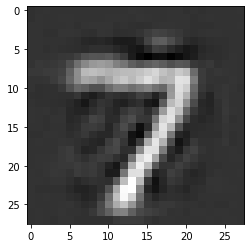

In [155]:
plt.imshow(out[0],cmap="gray")         

##### with just 50 features we are almost able to predict the number 

In [156]:
encoder= Model(inputs=model.input, outputs = model.layers[3].output)

In [157]:
encoder.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_37 (Dense)             (None, 50)                20050     
Total params: 334,050
Trainable params: 334,050
Non-trainable params: 0
_________________________________________________________________


In [143]:
encoder.predict(x_test).shape

(10000, 100)

In [144]:
x_test.shape

(10000, 28, 28)